# Анализ рынка недвижимости России (поиск инсайтов, составление рекомендаций девелоперам и стейкхолдерам)

## Введение в тему

#### Российский рынок недвижимости является одним из наиболее динамичных и важных направлений экономики страны. Так или иначе каждый из нас на протяжении своей жизни сталкивался с какими то жилищными вопросами, будь это аренда съемной квартиры, покупка или продажа. Любые новости связанные с рынком жилья являются объектом повышенного внимания. В условиях постоянных изменений в социально-экономической обстановке страны различные девелоперы, инвесторы и другие участники рынка недвижимости сталкиваются с необходимостью принятия обоснованных решений для достижения своих целей. В рамках аналитической работы мы проведём анализ имеющихся данных с целью определения самых популярных объектов недвижимости и трендов на рынке для составления рекомендаций для основных стейкхолдеров.

###### [здесь ссылка на датасет Russia Real Estate 2021](https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-2021)

## Постановка задач

#### Цель исследования:
#### Необходимо выявить параметры, определяющие влияние на стоимость недвижимости, закономерности и попытаться выяснить, на что необходимо обращать внимание при поиске квартиры в каждом из регионов РФ. Выполнение задачи предполагает:

#### 1. Предобработку данных
#### 2. Исследовательский анализ данных
#### 3. Построение линейной регрессии и оценка качества полученного уравнения
#### 4. Выводы

#### Цель этого проекта — выявить, какие признаки больше всего влияют на стоимость квартиры. Для анализа используется набор данных из Kaggle, крупнейшего в мире сообщества специалистов по данным и машинному обучению.

## Описание стейкхолдеров

#### Девелоперы: Основные участники рынка, строящие и предлагающие объекты недвижимости. Их интересы заключаются в эффективном управлении строительством и корректным ценообразованием объектов недвижимости.
#### Потребители: Физические лица, приобретающие недвижимость. Их интересы включают в себя соответствие объектов недвижимости их потребностям и доступность цен.
#### Государственные органы: Ответственные за регулирование рынка, статистические данные и разработку стратегий в области градостроительства. Их интересы связаны с обеспечением устойчивого развития этого сектора экономики, улучшения жилищных условий граждан.
#### Финансовые институты: Банки, кредитные организации, предоставляющие финансирование для строительства и приобретения недвижимости. Их интересы — обеспечение стабильности рынка и управление финансовыми рисками.

## Загрузить необходимые библиотеки и подгрузить файл

In [1]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

file_path = '/Users/A.Itsenkov/Documents/Учеба/диплом/input_data.csv'
data = pd.read_csv(file_path)

## Показать первые несколько строк данных для проверки

In [2]:
data = pd.read_csv(file_path, sep=';')
data.head(5)

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.780112,60.699355,0,2,620000.0,NaN,66,1632918.0
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.540060,37.725112,3,0,142701.0,242543.0,50,681306.0
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.608154,40.138381,0,0,385000.0,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.738685,37.713668,3,2,353960.0,439378.0,23,1730985.0


## Проверить типы данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11358150 entries, 0 to 11358149
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   price          int64  
 2   level          int64  
 3   levels         int64  
 4   rooms          int64  
 5   area           float64
 6   kitchen_area   float64
 7   geo_lat        float64
 8   geo_lon        float64
 9   building_type  int64  
 10  object_type    int64  
 11  postal_code    float64
 12  street_id      float64
 13  id_region      int64  
 14  house_id       float64
dtypes: float64(7), int64(7), object(1)
memory usage: 1.3+ GB


## Зафиксировать описание колонок в датафрейме

#### date - Дата размещения объявления
#### price - Цена в рублях
#### level - Этаж
#### levels - Кол-во этажей в доме
#### rooms - Кол-во комнат. Если значение равно "-1", значит это "студия"
#### area - общая площадь квартиры
#### kitchen_area - площадь кухни
#### geo_lat - Ширина
#### geo_lon - Длина
#### building_type - Тип фасада: 
#### 0 - Неизвестно. 1 - Другой. 2 - Панель. 3 - Монолит. 4 - Кирпич. 5 - Блок. 6 - Дерево
#### object_type - Тип объекта

# Очистка данных

##  Преобразовать цену с типа Int64 в float64

In [4]:
data['price'] = data['price'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11358150 entries, 0 to 11358149
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   price          float64
 2   level          int64  
 3   levels         int64  
 4   rooms          int64  
 5   area           float64
 6   kitchen_area   float64
 7   geo_lat        float64
 8   geo_lon        float64
 9   building_type  int64  
 10  object_type    int64  
 11  postal_code    float64
 12  street_id      float64
 13  id_region      int64  
 14  house_id       float64
dtypes: float64(8), int64(6), object(1)
memory usage: 1.3+ GB


## Вывести описательную статистику для ознакомления данных

In [5]:
data.describe()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
count,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07,1.135815e+07,1.085038e+07,7.152596e+06,1.135815e+07,8.096207e+06
mean,6.787516e+06,6.426675e+00,1.176266e+01,1.719417e+00,5.310356e+01,-2.674071e+00,5.440394e+01,5.229570e+01,1.017820e+00,5.275366e-01,4.031717e+05,3.525623e+05,5.125515e+01,1.703792e+06
std,1.977118e+08,5.283144e+00,7.218441e+00,1.157606e+00,2.712845e+01,3.241855e+01,4.582962e+00,2.183899e+01,1.562077e+00,8.813503e-01,1.959618e+05,1.366485e+05,2.250527e+01,6.404578e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+02,4.143758e+01,-1.732189e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.161870e+05,1.000000e+00,5.886060e+05
25%,2.600000e+06,2.000000e+00,5.000000e+00,1.000000e+00,3.650000e+01,0.000000e+00,5.319411e+01,3.763847e+01,0.000000e+00,0.000000e+00,1.961580e+05,2.339150e+05,3.100000e+01,1.162465e+06
50%,3.995000e+06,5.000000e+00,1.000000e+01,2.000000e+00,4.670000e+01,6.500000e+00,5.564688e+01,4.202111e+01,0.000000e+00,0.000000e+00,4.000070e+05,3.502220e+05,5.400000e+01,1.703143e+06
75%,6.500000e+06,9.000000e+00,1.700000e+01,2.000000e+00,6.300000e+01,1.050000e+01,5.687362e+01,6.547322e+01,2.000000e+00,2.000000e+00,6.250070e+05,4.705370e+05,7.200000e+01,2.255297e+06
max,6.355524e+11,5.000000e+01,5.000000e+01,9.000000e+00,4.999000e+02,4.080000e+02,7.350889e+01,1.792583e+02,6.000000e+00,2.000000e+00,8.621630e+05,5.885970e+05,2.000000e+02,2.839173e+06


#### Для начала приведем описательную статистику в удобный режим чтения, поменяв формат экспоненциальной записи в стандартный вид

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
count,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,10850379.00,7152596.00,11358150.00,8096207.00
mean,6787516.41,6.43,11.76,1.72,53.10,-2.67,54.40,52.30,1.02,0.53,403171.66,352562.33,51.26,1703792.31
std,197711828.43,5.28,7.22,1.16,27.13,32.42,4.58,21.84,1.56,0.88,195961.84,136648.51,22.51,640457.78
min,0.00,0.00,0.00,-1.00,1.00,-100.00,41.44,-173.22,0.00,0.00,0.00,116187.00,1.00,588606.00
25%,2600000.00,2.00,5.00,1.00,36.50,0.00,53.19,37.64,0.00,0.00,196158.00,233915.00,31.00,1162465.00
50%,3995000.00,5.00,10.00,2.00,46.70,6.50,55.65,42.02,0.00,0.00,400007.00,350222.00,54.00,1703143.00
75%,6500000.00,9.00,17.00,2.00,63.00,10.50,56.87,65.47,2.00,2.00,625007.00,470537.00,72.00,2255297.00
max,635552400000.00,50.00,50.00,9.00,499.90,408.00,73.51,179.26,6.00,2.00,862163.00,588597.00,200.00,2839173.00


#### У нас есть отрицательные значения, в которых нужно поменять знак с минуса на плюс. Это столбики kitchen_area и geo_lon. Из условия есть информация что в столбике rooms значение -1 означает студия. Примем за факт что студия это однокомнатная квартира, поэтому также поменяем отрицательные значения на положительные в этой колонке

## Поменять минусовые значения на положительные в столбиках rooms, kitchen_area, geo_lon и проверить результат. 

In [7]:
data['rooms'] = data['rooms'].abs()
data['kitchen_area'] = data['kitchen_area'].abs()
data['geo_lon'] = data['geo_lon'].abs()
data.describe()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
count,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,11358150.00,10850379.00,7152596.00,11358150.00,8096207.00
mean,6787516.41,6.43,11.76,1.87,53.10,16.56,54.40,52.30,1.02,0.53,403171.66,352562.33,51.26,1703792.31
std,197711828.43,5.28,7.22,0.90,27.13,28.00,4.58,21.84,1.56,0.88,195961.84,136648.51,22.51,640457.78
min,0.00,0.00,0.00,1.00,1.00,0.00,41.44,19.88,0.00,0.00,0.00,116187.00,1.00,588606.00
25%,2600000.00,2.00,5.00,1.00,36.50,0.00,53.19,37.64,0.00,0.00,196158.00,233915.00,31.00,1162465.00
50%,3995000.00,5.00,10.00,2.00,46.70,8.20,55.65,42.02,0.00,0.00,400007.00,350222.00,54.00,1703143.00
75%,6500000.00,9.00,17.00,2.00,63.00,13.00,56.87,65.47,2.00,2.00,625007.00,470537.00,72.00,2255297.00
max,635552400000.00,50.00,50.00,9.00,499.90,408.00,73.51,179.26,6.00,2.00,862163.00,588597.00,200.00,2839173.00


## Проверить незаполненные значения

In [8]:
data.isnull().sum()

date                   0
price                  0
level                  0
levels                 0
rooms                  0
area                   0
kitchen_area           0
geo_lat                0
geo_lon                0
building_type          0
object_type            0
postal_code       507771
street_id        4205554
id_region              0
house_id         3261943
dtype: int64

#### У нас есть три колонки где пропущено много данных. При наличии координат geo_lat и geo_lon у нас нет необходимости в колонках postal_code, street_id и house_id.  Так как в случае необходимости мы по координатам можем определить место продажи квартиры. Можно удалить в целом эти колонки, так как они не несут для нас информационной ценности.

## Удалить колонки postal_code, street_id и house_id. Проверить результат.

In [9]:
data = data.drop('street_id', axis=1)
data = data.drop('postal_code', axis=1)
data = data.drop('house_id', axis=1)
data.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,id_region
0,2021-01-01,2451300.00,15,31,1,30.30,0.00,56.78,60.70,0,2,66
1,2021-01-01,1450000.00,5,5,1,33.00,6.00,44.61,40.14,0,0,1
2,2021-01-01,10700000.00,4,13,3,85.00,12.00,55.54,37.73,3,0,50
3,2021-01-01,3100000.00,3,5,3,82.00,9.00,44.61,40.14,0,0,1
4,2021-01-01,2500000.00,2,3,1,30.00,9.00,44.74,37.71,3,2,23


## Удалить все строки где значения по колонке price равняются нулю

In [10]:
data = data[data['price'] != 0]
data.shape

(11350050, 12)

#### У нас вместо 11 358 150 значений осталось 11 350 050. Удалили порядка 8 тыс значений.

## Проверить и проработать выбросы по колонке price

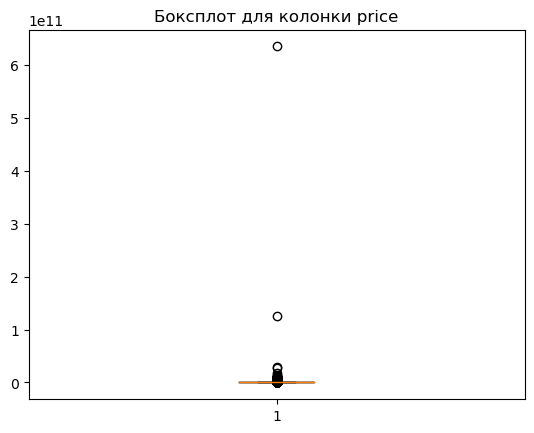

In [11]:
plt.boxplot(data['price'])
plt.title('Боксплот для колонки price')
plt.show()

#### видим аномальные значения - выбросы. Удалим 1% самых верхних и самых нижних выбросов и проверим график заново

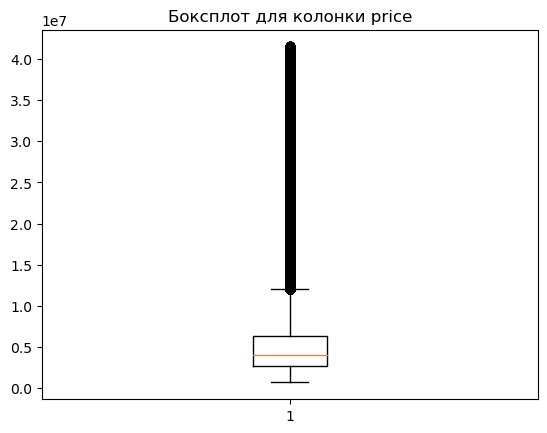

In [12]:
price_low = data['price'].quantile(0.01)
price_high  = data['price'].quantile(0.99)
data_final_price = data[(data['price'] < price_high) & (data['price'] > price_low)]
plt.boxplot(data_final_price['price'])
plt.title('Боксплот для колонки price')
plt.show()

## Проверить и проработать выбросы по остальным колонкам

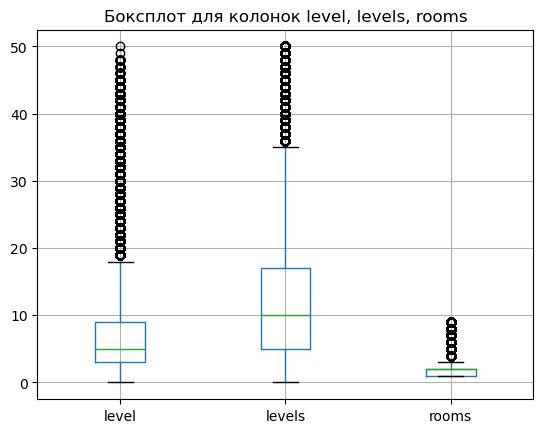

In [13]:
data_final_price[["level", "levels", "rooms"]].boxplot()
plt.title('Боксплот для колонок level, levels, rooms')
plt.show()

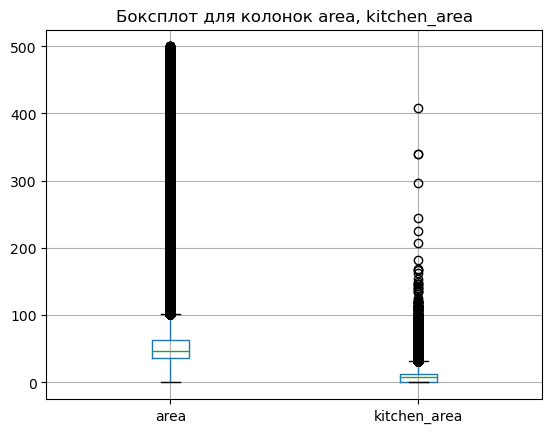

In [14]:
data_final_price[["area", "kitchen_area"]].boxplot()
plt.title('Боксплот для колонок area, kitchen_area')
plt.show()

#### Есть немного выбросов по колонке kitchen_area, но это можно списать на устройство квартиры. Проверим условие, что площадь кухни не может быть больше чем общая площадь квартиры.  

In [15]:
count_area_less_kitchen = (data_final_price['kitchen_area'] > data_final_price['area']).sum()
count_area_less_kitchen

1003039

#### У нас есть очень много квартир, в которых площадь кухни больше, чем общая площадь аппартаментов. Можно либо удалить все эти строки, либо поменять местами значения в этих двух колонках, списав некорректные данные на заслуги операциониста. Так как объем очень велик, то лучше заменить местами такие значения.

In [16]:
new_data = data_final_price.copy()
condition = new_data['kitchen_area'] > new_data['area']
new_data.loc[condition, ['kitchen_area', 'area']] = new_data.loc[condition, ['area', 'kitchen_area']].values
new_data.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,id_region
0,2021-01-01,2451300.00,15,31,1,30.30,0.00,56.78,60.70,0,2,66
1,2021-01-01,1450000.00,5,5,1,33.00,6.00,44.61,40.14,0,0,1
2,2021-01-01,10700000.00,4,13,3,85.00,12.00,55.54,37.73,3,0,50
3,2021-01-01,3100000.00,3,5,3,82.00,9.00,44.61,40.14,0,0,1
4,2021-01-01,2500000.00,2,3,1,30.00,9.00,44.74,37.71,3,2,23


## Проверить корректность заполнения по колонке id_region

In [17]:
new_data.id_region.unique()

array([ 66,   1,  50,  23,  34,  54,   3,  58,  77,  72,  78,  76,   2,
        40,  73,  18,  48,  27,  41,  63,  38,  15,  10,  39,  86,  16,
        47,   7,  26,   5,  91,  52,  56,  36,   9,  33,  31,  24,  74,
        22,  17,  43,  32,  64,  59,  46,  44,  61,  42,  12,  71,  57,
        29,  37,  21,  92,  51,  19,  70,  30,  75,  13,  69,  62,   8,
        35,  28,  68,  14,  20,  45,  55,  67,  25,  89,  11,  53,  60,
         6,  65,  49,   4, 200,  87,  83,  79])

In [18]:
region_200_data = new_data[new_data['id_region'] == 200]
region_200_data.shape

(3543, 12)

#### Обратим внимание что у нас есть максимальный регион 200. В России на данный момент всего 89 регионов. Будем считать что 200 регион это некорректные данные и удалим их из датафрейма, тем более таких значений у нас мало.

In [19]:
new_data = new_data[new_data['id_region'] != 200]
new_data.shape

(11113712, 12)

## Удалить дубликаты записей.

In [20]:
new_data.duplicated().sum()

401428

In [21]:
final_data = new_data.drop_duplicates()
final_data.shape

(10712284, 12)

## Подготовить датасет для исследовательского анализа добавив колонку с названием региона

In [22]:
regions = {
    1: 'Республика Адыгея',
    2: 'Республика Башкортостан', 
    3: 'Республика Бурятия',
    4: 'Республика Алтай',
    5: 'Республика Дагестан',
    6: 'Республика Ингушетия',
    7: 'Кабардино-Балкарская Республика',
    8: 'Республика Калмыкия',
    9: 'Карачаево-Черкесская Республика',
    10: 'Республика Карелия',
    11: 'Республика Коми',
    12: 'Республика Марий Эл', 
    13: 'Республика Мордовия', 
    14: 'Республика Саха', 
    15: 'Республика Северная Осетия-Алания', 
    16: 'Республика Татарстан', 
    17: 'Республика Тыва',
    18: 'Удмуртская Республика',
    19: 'Республика Хакасия',
    20: 'Чеченская Республика',
    21: 'Чувашская Республика',
    22: 'Алтайский край',
    23: 'Краснодарский край',
    24: 'Красноярский край',
    25: 'Приморский край',
    26: 'Ставропольский край',
    27: 'Хабаровский край',
    28: 'Амурская область',
    29: 'Архангельская область',
    30: 'Астраханская область',
    31: 'Белгородская область',
    32: 'Брянская область',
    33: 'Владимирская область',
    34: 'Волгоградская область',
    35: 'Вологодская область',
    36: 'Воронежская область',
    37: 'Ивановская область',
    38: 'Иркутская область',
    39: 'Калининградская область',
    40: 'Калужская область',
    41: 'Камчатский край',
    42: 'Кемеровская область',
    43: 'Кировская область',
    44: 'Костромская область',
    45: 'Курганская область',
    46: 'Курская область',
    47: 'Ленинградская область',
    48: 'Липецкая область',
    49: 'Магаданская область',
    50: 'Московская область',
    51: 'Мурманская область',
    52: 'Нижегородская область',
    53: 'Новгородская область',
    54: 'Новосибирская область',
    55: 'Омская область',
    56: 'Оренбургская область',
    57: 'Орловская область',
    58: 'Пензенская область',
    59: 'Пермский край',
    60: 'Псковская область',
    61: 'Ростовская область',
    62: 'Рязанская область',
    63: 'Самарская область',
    64: 'Саратовская область',
    65: 'Сахалинская область',
    66: 'Свердловская область',
    67: 'Смоленская область',
    68: 'Тамбовская область',
    69: 'Тверская область',
    70: 'Томская область',
    71: 'Тульская область',
    72: 'Тюменская область',
    73: 'Ульяновская область',
    74: 'Челябинская область',
    75: 'Забайкальский край',
    76: 'Ярославская область',
    77: 'Город Москва',
    78: 'Город Санкт-Петербург',
    79: 'Еврейская автономная область',
    83: 'Ненецкий автономный округ',
    86: 'Ханты-Мансийский автономный округ',
    87: 'Чукотский автономный округ',
    89: 'Ямало-Ненецкий автономный округ',
    91: 'Республика Крым',
    92: 'Город Севастополь'
}
final_df = final_data.copy()
final_df['region_name'] = final_df['id_region'].map(regions)
final_df.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,id_region,region_name
0,2021-01-01,2451300.00,15,31,1,30.30,0.00,56.78,60.70,0,2,66,Свердловская область
1,2021-01-01,1450000.00,5,5,1,33.00,6.00,44.61,40.14,0,0,1,Республика Адыгея
2,2021-01-01,10700000.00,4,13,3,85.00,12.00,55.54,37.73,3,0,50,Московская область
3,2021-01-01,3100000.00,3,5,3,82.00,9.00,44.61,40.14,0,0,1,Республика Адыгея
4,2021-01-01,2500000.00,2,3,1,30.00,9.00,44.74,37.71,3,2,23,Краснодарский край


# Исследовательский анализ

## Вывести топ 10 регионов по количеству продаж

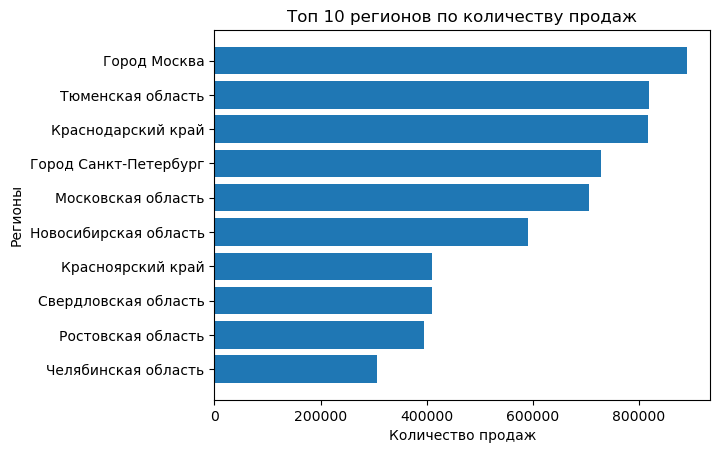

In [23]:
sales_in_region = final_df['region_name'].value_counts().sort_values(ascending=True).tail(10)
plt.barh(sales_in_region.index, sales_in_region.values)
plt.xlabel('Количество продаж')
plt.ylabel('Регионы')
plt.title('Топ 10 регионов по количеству продаж')
plt.show()

#### Вывод: можем увидеть популярность регионов как для жизни потенциальных клиентов так и для инвестиций наших стейкхолдеров

## Вывести минимальные и максимальные цены объектов для каждого региона, показать лидеров

In [24]:
final_df.groupby('region_name', as_index=False).agg(min_price = ("price", "min"))

,region_name,min_price
0,Алтайский край,705000.00
1,Амурская область,720000.00
2,Архангельская область,710000.00
3,Астраханская область,710000.00
4,Белгородская область,710000.00
...,...,...
80,Чеченская Республика,750000.00
81,Чувашская Республика,705000.00
82,Чукотский автономный округ,800000.00
83,Ямало-Ненецкий автономный округ,750000.00


In [25]:
top_10_min = final_df.sort_values(by = 'price', ascending=True) 
top_10_min[['region_name', 'price']].head(10)

,region_name,price
10565130,Республика Башкортостан,700001.00
11284299,Кабардино-Балкарская Республика,700002.00
2877173,Кабардино-Балкарская Республика,700003.00
9440529,Кабардино-Балкарская Республика,700004.00
9202353,Республика Татарстан,700020.00
4249684,Новосибирская область,700050.00
7695331,Краснодарский край,700100.00
9089320,Рязанская область,700200.00
7527083,Свердловская область,700202.00
7500668,Свердловская область,700202.00


In [26]:
final_df.groupby('region_name', as_index=True).agg(max_price = ("price", "max"))

,max_price
region_name,
Алтайский край,37500000.00
Амурская область,39994600.00
Архангельская область,32500000.00
Астраханская область,34000000.00
Белгородская область,40000000.00
...,...
Чеченская Республика,32000000.00
Чувашская Республика,37500000.00
Чукотский автономный округ,13000000.00


In [27]:
top_10_max = final_df.sort_values(by = 'price', ascending=False) 
top_10_max[['region_name', 'price']].head(10)

,region_name,price
9005902,Город Москва,41499999.00
8177521,Город Москва,41499015.00
8176813,Город Москва,41499015.00
7300178,Московская область,41499000.00
11200081,Московская область,41499000.00
1848734,Город Санкт-Петербург,41499000.00
2644433,Город Санкт-Петербург,41499000.00
215511,Город Москва,41497600.00
5343492,Город Санкт-Петербург,41496692.00
9981118,Город Санкт-Петербург,41496692.00


#### Вывод: минимальные и максимальные цены могут значительно варьироваться от региона к региону. Это может быть связано с различиями в инфраструктуре, уровне жизни, удаленностью от крупных городов и так далее. Выявление лидеров может помочь выявить предпочтения покупателей. Регионы с низкими ценами могут представлять интерес для инвесторов, исследующих возможности для роста стоимости недвижимости. С другой стороны, высокие цены могут свидетельствовать о популярности и высоком спросе на жилье в этих районах.

## Выявить для каждого региона средние цены объектов. Вывести регионы в которых наиболее минимальные и наиболее максимальные цены на квартиры

In [28]:
list_of_avg = final_df.groupby('region_name', as_index=False).agg(avg_price = ("price", "mean"))
list_of_avg.head()

,region_name,avg_price
0,Алтайский край,2967489.33
1,Амурская область,5037904.37
2,Архангельская область,3712472.15
3,Астраханская область,2934585.23
4,Белгородская область,3833270.55


In [29]:
top_5_max_avg = list_of_avg.nlargest(5, 'avg_price')
top_5_min_avg = list_of_avg.nsmallest(5, 'avg_price')

print("Топ 5 максимальных значений:")
print(top_5_max_avg)

print("\nТоп 5 минимальных значений:")
print(top_5_min_avg)

Топ 5 максимальных значений:
              region_name   avg_price
10           Город Москва 14395566.35
11  Город Санкт-Петербург  9229748.33
66    Сахалинская область  7600400.20
12      Город Севастополь  7229060.34
32     Московская область  6903944.84

Топ 5 минимальных значений:
                     region_name  avg_price
27            Курганская область 2071692.42
13  Еврейская автономная область 2395277.78
39          Оренбургская область 2435779.91
56           Республика Мордовия 2510765.89
55           Республика Марий Эл 2521892.84


#### Анализ средних и минимальных\максимальных цен по регионам предоставляет комплексное представление о рынке недвижимости и может помочь в принятии обоснованных стратегических решений в том числе с точки зрения привлекательности регионов и инвестиционных возможностей.

## Рассчитать модальные, медианные и средние значения по всем регионам

In [30]:
final_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mode).reset_index() 

/var/folders/8d/y4scgnr16x95xzbjrlkvmnf40000gp/T/ipykernel_83395/3698910862.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mode).reset_index()


,region_name,price,level,levels,rooms,area
0,Алтайский край,2500000.00,1,5,2,100.00
1,Амурская область,4500000.00,1,5,1,100.00
2,Архангельская область,3500000.00,2,5,2,100.00
3,Астраханская область,2500000.00,1,5,2,100.00
4,Белгородская область,3500000.00,1,9,1,100.00
...,...,...,...,...,...,...
80,Чеченская Республика,3500000.00,1,5,2,100.00
81,Чувашская Республика,2500000.00,1,9,1,100.00
82,Чукотский автономный округ,8500000.00,3,5,2,100.00
83,Ямало-Ненецкий автономный округ,5500000.00,1,9,1,100.00


In [31]:
final_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.median).reset_index()

/var/folders/8d/y4scgnr16x95xzbjrlkvmnf40000gp/T/ipykernel_83395/891841969.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.median).reset_index()


,region_name,price,level,levels,rooms,area
0,Алтайский край,2680000.00,4.00,9.00,2.00,51.10
1,Амурская область,4600000.00,3.00,5.00,2.00,55.00
2,Архангельская область,3490000.00,4.00,8.00,2.00,48.00
3,Астраханская область,2600000.00,4.00,5.00,2.00,57.00
4,Белгородская область,3600000.00,4.00,9.00,2.00,53.00
...,...,...,...,...,...,...
80,Чеченская Республика,3150000.00,4.00,5.00,2.00,100.00
81,Чувашская Республика,2500000.00,4.00,9.00,2.00,50.00
82,Чукотский автономный округ,4900000.00,3.00,5.00,2.00,59.50
83,Ямало-Ненецкий автономный округ,5700000.00,4.00,8.00,2.00,54.00


In [32]:
pd.options.display.float_format = '{:.2f}'.format
final_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mean).reset_index()

/var/folders/8d/y4scgnr16x95xzbjrlkvmnf40000gp/T/ipykernel_83395/1922251116.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mean).reset_index()


,region_name,price,level,levels,rooms,area
0,Алтайский край,2967489.33,5.52,10.10,1.98,58.17
1,Амурская область,5037904.37,4.12,7.28,1.90,62.40
2,Архангельская область,3712472.15,4.19,7.32,2.03,54.27
3,Астраханская область,2934585.23,4.41,7.39,2.09,62.59
4,Белгородская область,3833270.55,4.67,8.15,2.07,58.53
...,...,...,...,...,...,...
80,Чеченская Республика,3724714.07,4.45,7.17,2.38,81.15
81,Чувашская Республика,2873109.88,5.28,9.39,1.81,56.82
82,Чукотский автономный округ,5075018.76,3.13,4.79,2.14,67.34
83,Ямало-Ненецкий автономный округ,5941943.17,4.05,6.92,1.98,55.31


#### Общий инсайт: Если мода четко выражена в важном для стейкхолдера регионе, это может указывать на характерные для особенности этого региона. Например, это массовая однотипная застройка, от которой сейчас пытаются избавиться владельцы. Медиана может быть полезна в случае самых разных диапазонов цен, при наличии очень дешевого или очень премиального жилья и может дать представление о центре распределения, найти некую золотую середину, что также может быть полезно для инвесторов. Среднее значение может быть кривым при наличии существенных выбросов, но мы от них в целом избавились, поэтому, этот показатель тоже может существенно раскрыть информацию о регионе, насколько там отличается ценники от соседнего региона, а при наличии динамики - проверить рост в том или ином регионе.

## Рассчитать модальные, медианные и средние значения по Санкт-Петербургу

In [33]:
filtered_spb_df = final_df.query("region_name == 'Город Санкт-Петербург'")
filtered_spb_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mode).reset_index()

/var/folders/8d/y4scgnr16x95xzbjrlkvmnf40000gp/T/ipykernel_83395/1483354321.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  filtered_spb_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mode).reset_index()


,region_name,price,level,levels,rooms,area
0,Город Санкт-Петербург,6500000.00,2,5,1,100.00


In [34]:
filtered_spb_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.median).reset_index()

/var/folders/8d/y4scgnr16x95xzbjrlkvmnf40000gp/T/ipykernel_83395/2664591544.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  filtered_spb_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.median).reset_index()


,region_name,price,level,levels,rooms,area
0,Город Санкт-Петербург,7221430.00,6.00,13.00,1.00,50.00


In [35]:
filtered_spb_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mean).reset_index()


/var/folders/8d/y4scgnr16x95xzbjrlkvmnf40000gp/T/ipykernel_83395/3679669801.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  filtered_spb_df.groupby(['region_name'])['price', 'level', 'levels', 'rooms', 'area'].agg(pd.Series.mean).reset_index()


,region_name,price,level,levels,rooms,area
0,Город Санкт-Петербург,9229748.33,7.47,14.00,1.74,58.27


#### Выводы:
#### 1. В Санкт-Петербурге наиболее часто можно встретить жильё, которое продаётся за 6 500 000, при чем медианное и среднее значение в этом городе выше, следовательно, активно продатся бюджетное жилье, эконом класса. Возможно, нашим инвесторам стоит обратить внимание и больше сориентироваться на жилье менее бюджетного варианта. 
#### 2. Медианная цена не чувствительна к выбросам, поэтому без наличия дополнительной информации такой как год постройки дома, ремонт и так далее - можно было бы со временем использовать как основную метрику для наблюдения тенденций в городе.
#### 3. Средняя цена выше медианной и модальной, что может быть свидетельством наличия высоких значений в распределении. Возможно, в некоторых регионах есть дорогие объекты недвижимости, которые влияют на среднюю цену.
#### 4. Что касается остальных данных типа этажности, площади - эта информация может быть полезна инвесторам, они помогают понять типичные характеристики в регионе и выявить аномалии. Например, у нас есть модальное значение по площади квартир 100, то есть наиболее часто попадаются квартиры, у которых площадь 100 квадратных метров. Возможно это аномалия, люди просто округляют свою площадь. Или, например, при средней этажности в доме в 14 этажей, у нас модальное значение равно 5. Можно сделать вывод, что люди пытаются чаще пытаются избавиться от квартир на 5 этаже. Так как в советское время часто стоили пятиэтажные дома, то это самый последний этаж, а на последнем этаже люди не очень любят покупать квартиры, из-за опасений в крыше.

## Рассчитать дисперсию и среднее отклонение по цене в регионах и Санкт-Петербурге в отдельности.

In [36]:
final_df.groupby(['region_name'])['price'].agg(['var', 'std']).reset_index()

,region_name,var,std
0,Алтайский край,2623930584820.79,1619855.11
1,Амурская область,6909607043064.32,2628613.14
2,Архангельская область,3994631108430.15,1998657.33
3,Астраханская область,2982752168939.36,1727064.61
4,Белгородская область,3168732261759.13,1780093.33
...,...,...,...
80,Чеченская Республика,5126040264788.74,2264076.03
81,Чувашская Республика,2979019478282.13,1725983.63
82,Чукотский автономный округ,8770269575265.71,2961464.09
83,Ямало-Ненецкий автономный округ,7617420241133.25,2759967.43


In [37]:
filtered_spb_df.groupby(['region_name'])['price'].agg(['var', 'std']).reset_index()

,region_name,var,std
0,Город Санкт-Петербург,38221256229981.61,6182334.21


#### Дисперсия в регионах указывает на большой разброс данных относительно среднего значения.
#### СКО в регионах измеряет среднюю величину отклонения каждого значения от среднего значения. Оно также предоставляет информацию о стандартном разбросе данных.

#### Что касается Санкт-Петербурга, то дисперсия очень большая, следовательно, есть квартиры как очень дешевые, так и очень дорогие, большой разброс в данных.
#### Среднее отклонение в Санкт-Петербурге получилось в районе 6.2 млн руб. Следовательно,  большинство цен на квартиры в городе расположены в пределах примерно ±6.2 млн рублей от средней цены.

## Построить график средних цен по регионам

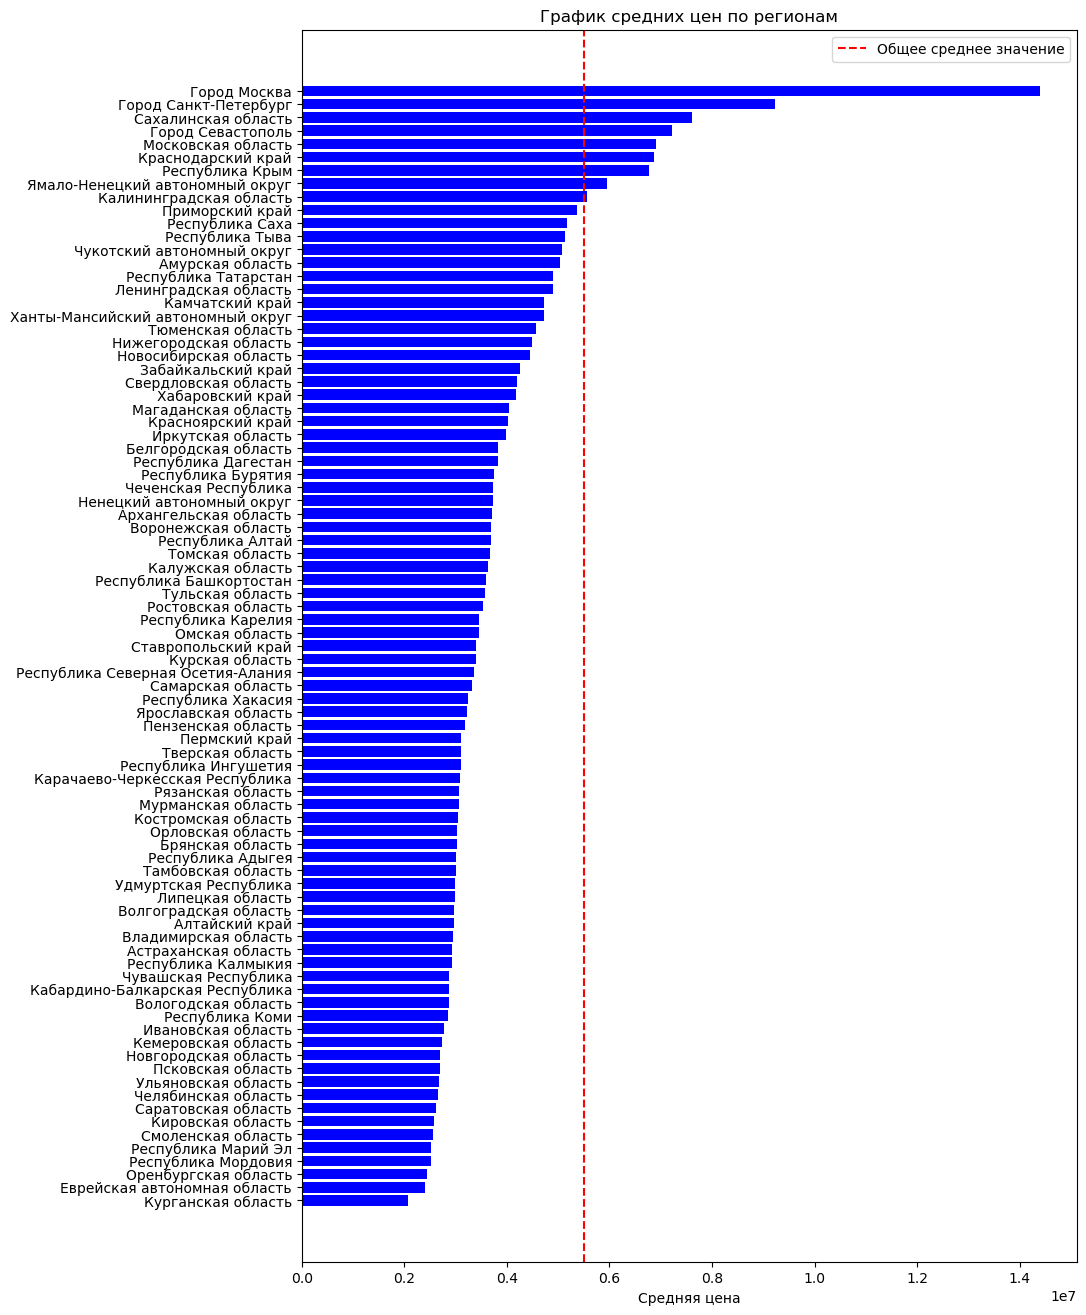

In [38]:
average_price_by_region = final_df.groupby(['region_name'])['price'].mean().reset_index()
overall_mean_price = final_df['price'].mean()
sorted_regions = average_price_by_region.sort_values(by='price', ascending=True)
fig, ax = plt.subplots(figsize=(10, 16))
ax.barh(sorted_regions['region_name'], sorted_regions['price'], color='blue')
ax.axvline(x=overall_mean_price, color='red', linestyle='--', label='Общее среднее значение')
ax.set_xlabel('Средняя цена')
ax.set_title('График средних цен по регионам')
ax.legend()
plt.show()

## Построить график цен по всем регионам

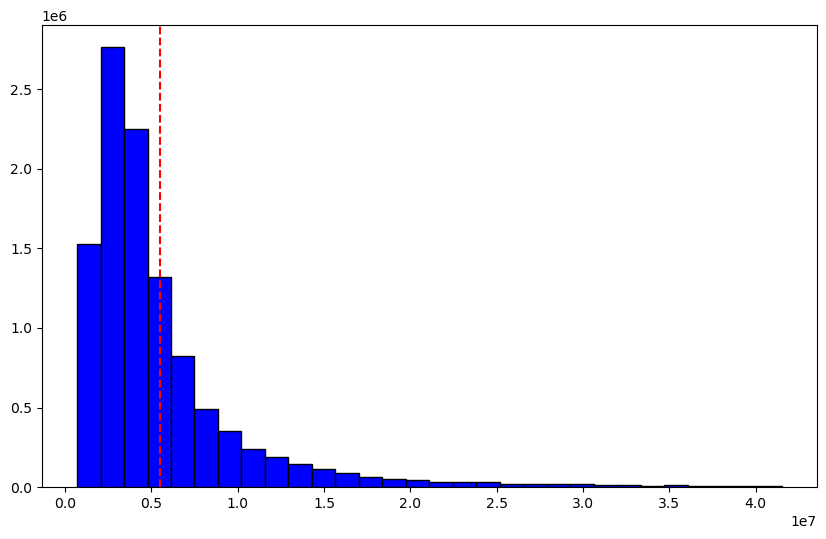

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(final_df['price'], bins=30, color='blue', edgecolor='black')
ax.axvline(x=overall_mean_price, color='red', linestyle='--', label='Mean Price')

#### Наш график подчиняется закону нормального распределения. Заметна асимметрия.

## Удалить все лишние столбцы (которые по нашему мнению не влияют на цену объекта) - id_region, region_name и date. Построить тепловую карту - матрицу корреляций для всех регионов и для Санкт-Петербурга в отдельности.

In [40]:
cor_df = final_df.drop(columns=['date', 'id_region', 'region_name'])
cor_df.head()

,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type
0,2451300.00,15,31,1,30.30,0.00,56.78,60.70,0,2
1,1450000.00,5,5,1,33.00,6.00,44.61,40.14,0,0
2,10700000.00,4,13,3,85.00,12.00,55.54,37.73,3,0
3,3100000.00,3,5,3,82.00,9.00,44.61,40.14,0,0
4,2500000.00,2,3,1,30.00,9.00,44.74,37.71,3,2


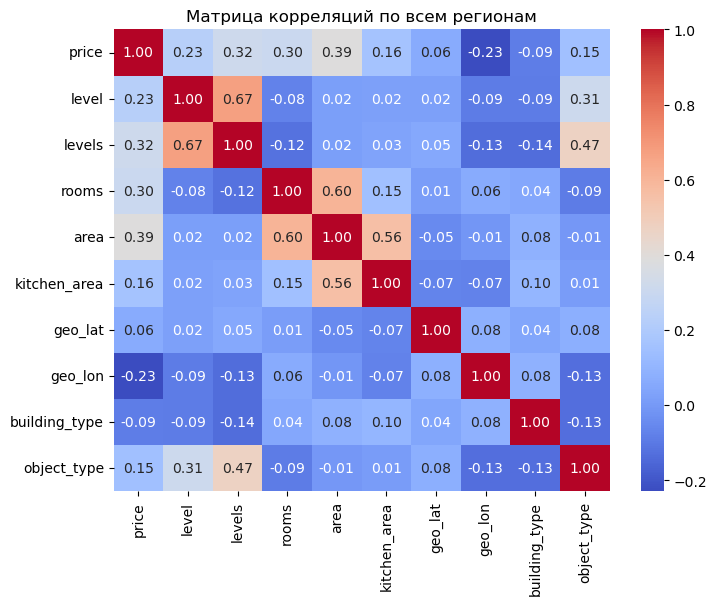

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(cor_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций по всем регионам')
plt.show()

#### Вывод: Если смотреть взаимосвязь в целом по России, то наша матрица корреляций малоинформативна, нет коэффициента свыше 0.39 по отношению к цене объектов. Это говорит о том, что все наши переменные (например, плозадь, этаж или количество комнат) имеют некоторую степень взаимосвязи с ценой, но она не является очень сильной. 

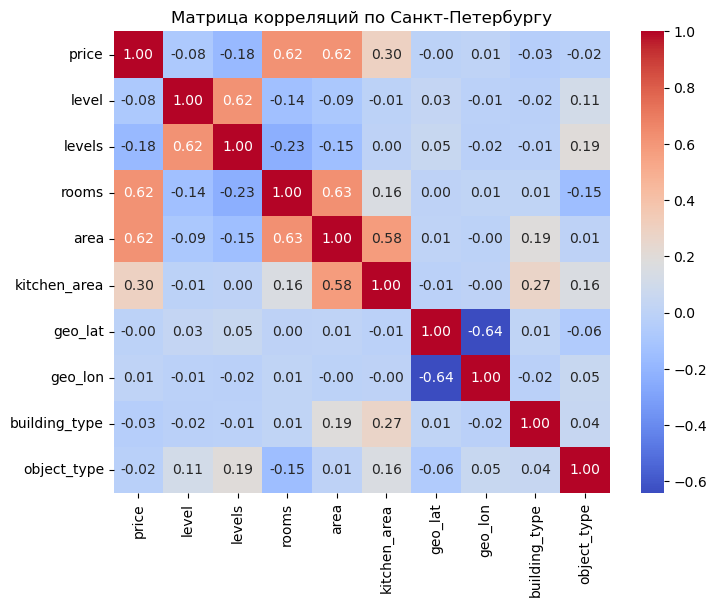

In [42]:
df_spb = final_df[final_df.region_name == 'Город Санкт-Петербург'].copy()
df_spb = df_spb.drop(columns=['date', 'id_region', 'region_name'])
plt.figure(figsize=(8, 6))
sns.heatmap(df_spb.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций по Санкт-Петербургу')
plt.show()

#### Вывод: если рассматривать коэффициенты корреляции по Санкт-Петербургу отдельно, то уже есть более четкая связь площади квартиры и соответственно наличие комнат с ценой, так как вполне логично, что чем больше площадь квартиры, тем больше комнат в этой квартире. 

## Построить график корреляции цены с площадью квартир по всем регионам и по Санкт-Петербургу в отдельности

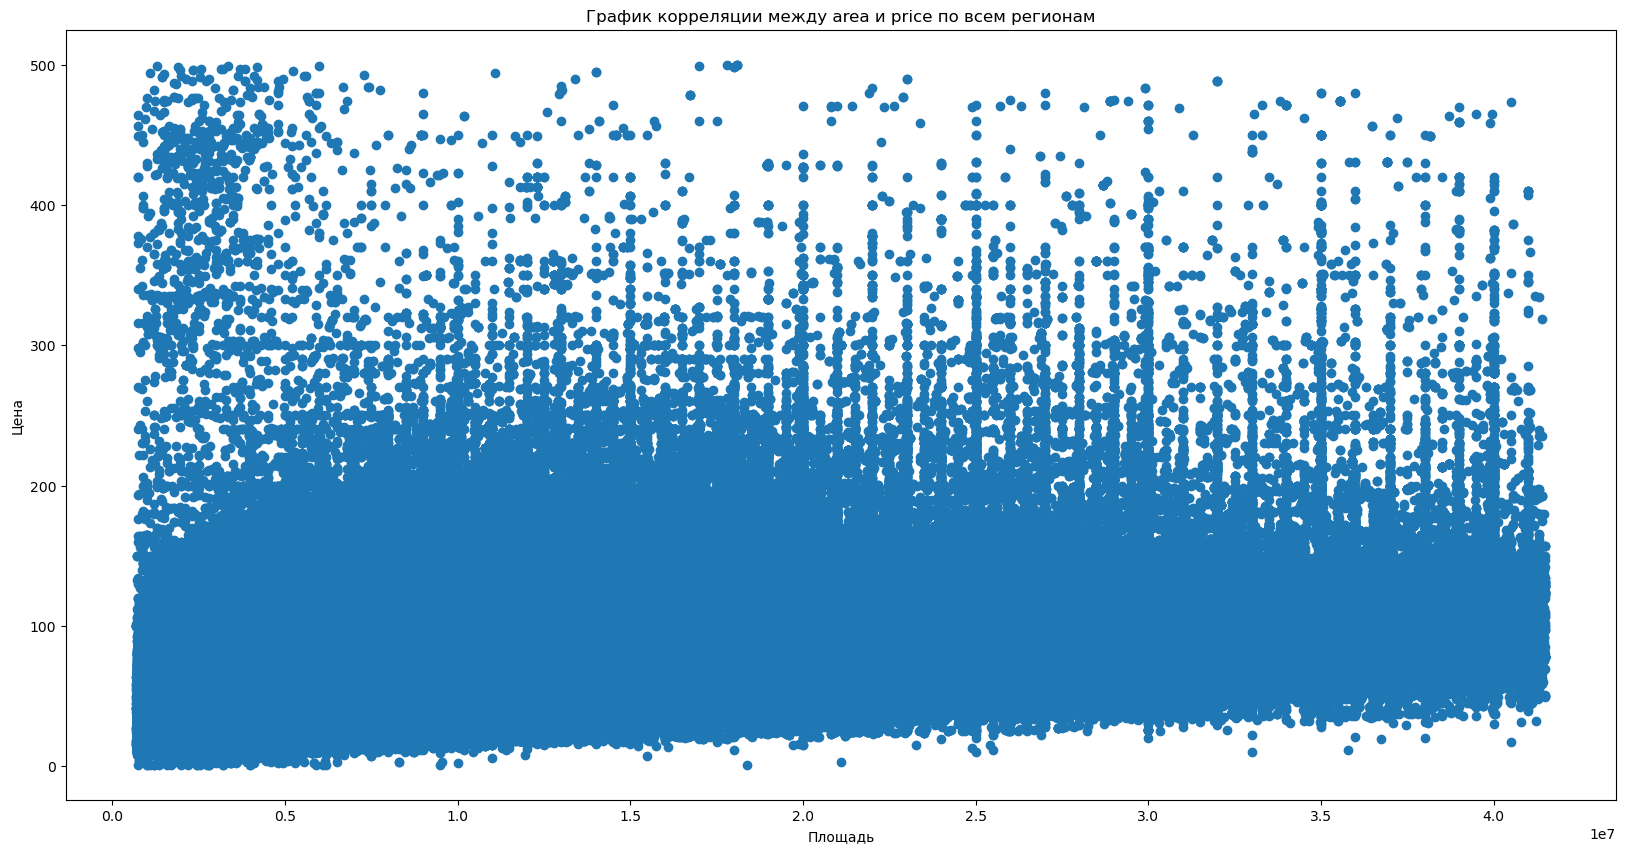

In [43]:
plt.figure(figsize=(20, 10))
plt.scatter(final_df['price'], final_df['area'])
plt.title('График корреляции между area и price по всем регионам')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

#### Этот график позволяет визуально оценить взаимосвязь между двумя переменными. Можно сделать несколько выводов: 
#### 1. Наш коэф корреляции указывает на наличие умеренной положительной линейной корреляции между переменными (цена и площадь).
#### 2. Разброс точек может указывать на различия в структуре рынка. В нашем случае практически нет дешевых квартир с большой площадью и тенденция сохраняется. 
#### 3. У нас нет аномальных выбросов, следовательно, очистку данных мы провели корректно.
#### 4. Продавцы любят округлять цифры при продаже объектов (можно заметить столбики над округленными цифрами.
#### 5. Есть небольшая плотность квартир в левом верхнем углу графика, то есть квартиры с минимальной площадью, которые стоят очень больших денег. Данная информация также могла бы быть интересна стейкхолдерам.

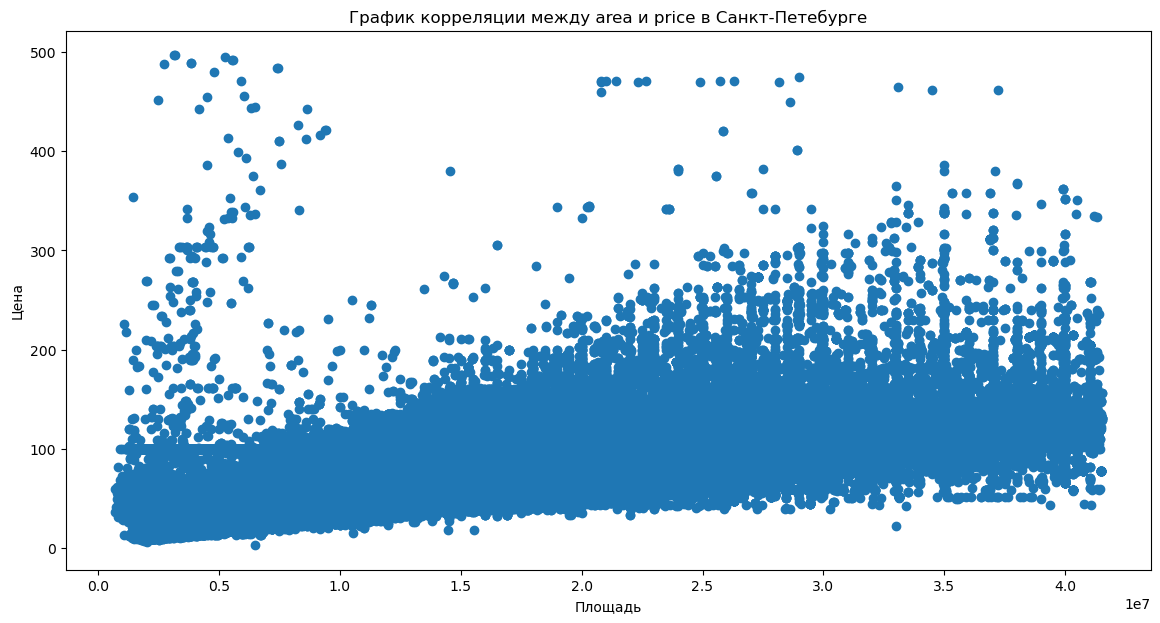

In [44]:
plt.figure(figsize=(14, 7))
plt.scatter(df_spb['price'], df_spb['area'])
plt.title('График корреляции между area и price в Санкт-Петебурге')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

#### На примере Санкт-Петербурга коэф корреляции между площадью и ценой становится более существенным, корреляция усиливается. Все предыдущие выводы также актуальны и для Санкт-Петербурга

## Добавим в нашу таблицу еще один признак - количество человек в регионе.

In [45]:
# https://ru.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D1%83%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B9_%D0%A4%D0%B5%D0%B4%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D0%B8
Pop = {
    1: 497985,
    2: 4077600, 
    3: 974628,
    4: 210769,
    5: 3209781,
    6: 519078,
    7: 903266,
    8: 264483,
    9: 468444,
    10: 527880,
    11: 726434,
    12: 672321, 
    13: 771373, 
    14: 997565, 
    15: 680748, 
    16: 4001625, 
    17: 337271,
    18: 1442251,
    19: 530233,
    20: 1533209,
    21: 1173177,
    22: 2130950,
    23: 5819345,
    24: 2845545,
    25: 1820076,
    26: 2891204,
    27: 1284090,
    28: 756198,
    29: 1005687,
    30: 1005687,
    31: 1514527,
    32: 1152505,
    33: 1325510,
    34: 2470057,
    35: 1128782,
    36: 2285282,
    37: 914725,
    38: 2344360,
    39: 1032343,
    40: 1070853,
    41: 288730,
    42: 2568238,
    43: 1138112,
    44: 571900,
    45: 761586,
    46: 1067034,
    47: 2023767,
    48: 1126263,
    49: 134315,
    50: 8591736,
    51: 658698,
    52: 3081817,
    53: 575926,
    54: 2794266,
    55: 1832064,
    56: 1841377,
    57: 700276,
    58: 1246609,
    59: 2508352,
    60: 587786,
    61: 4164547,
    62: 1088918,
    63: 3142683,
    64: 2404944,
    65: 460535,
    66: 4239161,
    67: 873041,
    68: 966250,
    69: 1211183,
    70: 1052106,
    71: 1481471,
    72: 3851234,
    73: 1181006,
    74: 3407145,
    75: 992429,
    76: 1194605,
    77: 13104177,
    78: 5600044,
    79: 147458,
    83: 41383,
    86: 1730353,
    87: 47840,
    89: 512387,
    91: 1916805,
    92: 558273
}

In [46]:
final_df_h = final_data.copy()

In [47]:
final_df_h['Population'] = final_df['id_region'].map(Pop)

In [48]:
final_df_h.head(10)

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,id_region,Population
0,2021-01-01,2451300.00,15,31,1,30.30,0.00,56.78,60.70,0,2,66,4239161
1,2021-01-01,1450000.00,5,5,1,33.00,6.00,44.61,40.14,0,0,1,497985
2,2021-01-01,10700000.00,4,13,3,85.00,12.00,55.54,37.73,3,0,50,8591736
3,2021-01-01,3100000.00,3,5,3,82.00,9.00,44.61,40.14,0,0,1,497985
4,2021-01-01,2500000.00,2,3,1,30.00,9.00,44.74,37.71,3,2,23,5819345
5,2021-01-01,1450000.00,5,5,2,47.00,6.00,48.51,44.57,2,0,34,2470057
6,2021-01-01,9000000.00,2,4,3,107.40,21.30,55.01,82.93,4,0,54,2794266
7,2021-01-01,2990000.00,1,2,3,54.00,7.00,51.83,107.60,0,0,3,974628
8,2021-01-01,2300000.00,16,18,1,39.70,11.50,45.00,39.09,4,0,23,5819345
9,2021-01-01,2290000.00,2,2,2,53.20,16.00,53.16,45.03,5,0,58,1246609


In [51]:
correlation = final_df_h['Population'].corr(final_df['price'])
print(f"Корреляция между ценой и количеством человек проживающих в регионе: {correlation}")

Корреляция между ценой и количеством человек проживающих в регионе: 0.5802918580927318


#### У нас есть четкая связь между количеством человек в регионе и ценой квартиры. Чем более населенный регион - тем дороже стоят квартиры и наоборот. 

## Построим точечный график зависимости цены квартиры от населения

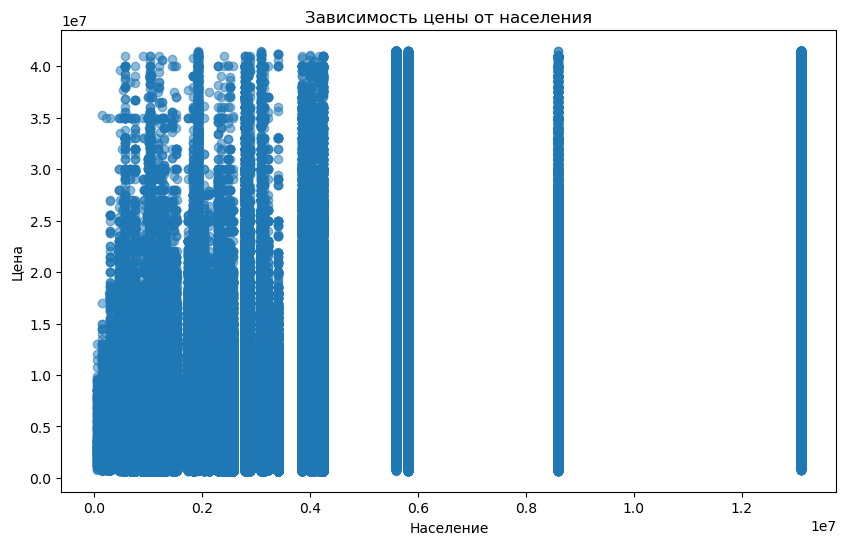

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df_h['Population'], final_df_h['price'], alpha=0.5)
plt.title('Зависимость цены от населения')
plt.xlabel('Население')
plt.ylabel('Цена')
plt.show()

#### Из графика очевидно что чем меньше населения в регионе, тем меньше дорогих квартир

## Построить линейную регрессию по Санкт-Петербургу и оценить качество модели

In [57]:
features = ['area', 'rooms', 'kitchen_area']
X = df_spb[features]
y = df_spb['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE на тренировочных данных: {rmse_train}')
print(f'RMSE на тестовых данных: {rmse_test}')

RMSE на тренировочных данных: 4518012.555023314
RMSE на тестовых данных: 4506067.633600734


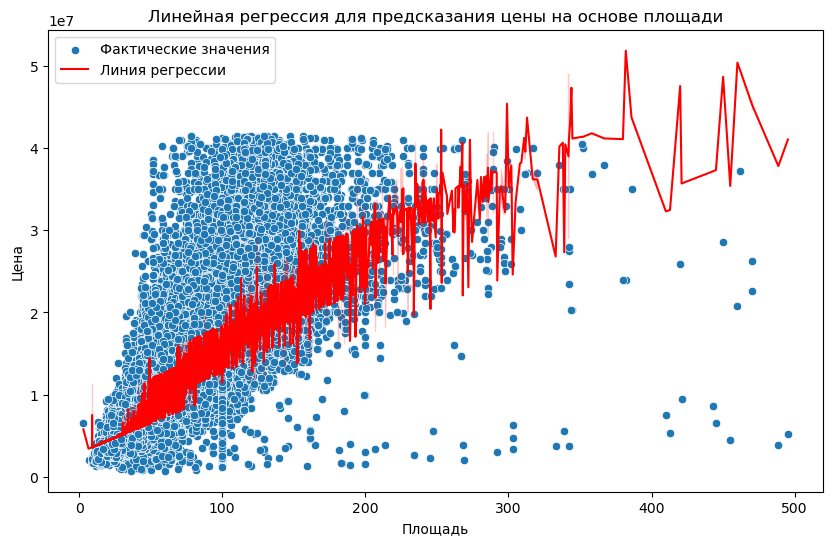

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['area'], y=y_test, label='Фактические значения')
sns.lineplot(x=X_test['area'], y=y_test_pred, color='red', label='Линия регрессии')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.title('Линейная регрессия для предсказания цены на основе площади')
plt.legend()
plt.show()


#### Оба значения RMSE довольно велики, и это может указывать на то, что модель линейной регрессии не слишком успешно справляется с предсказанием цен. С учетом средней цены объявления более 9 млн руб, процентная ошибка будет равна почти 50%, что очень много. Чем меньше процентная ошибка RMSE, тем лучше модель предсказывает значения целевой переменной. Следовательно, таких данных как площадь квартиры/кухни и количество комнат достаточно мало, чтобы построить более способную модель регрессии.

## Итоговые выводы:
#### 1) Корреляция переменных. Мы обнаружили корреляцию между ценой квартиры и площадью жилья. Чем больше площадь жилья, тем выше стоимость квартиры. Это не единственные признаки влияющие на цену, необходимо продолжать поиск дополнительных признаков доля описания более полноценной модели, например, тип жилья (эконом, бизнес, премиум и тп), год постройки здания, капитальный ремонт здания и так далее. Так как такие параметры как площадь жилья, количество комнат и так далее имеют полодительную высокую корреляцию с ценой квартиры, это указывает на их важность при определении стоимости жилья. Рассмотрев отдельно информацию по Санкт-Петербургу мы подтвердили этот вывод.

#### 2) В таблице обнаружено большое количество пропущенных значений, дубликатов, неверно указанных регионов. Рекомендуется дополнительное исследование источников информации. Также в таблице имеются как очень маленькие, так и очень большие выбросы. Необходимо провести исследование и зарегламентировать работу с выбросами для дальнейшего учета, основанного на наших данных.

#### 3) Мы выявили топ популярных и непопулярных регионов, рассмотрели моду, медиану, средниее значение. Исходя из этих данных мы можем понять популярность того или иного региона, понять ориентир стандартных характеристик наших объектов недвижимости, например, этажность здания, количество комнат и так далее. Эта информация также может быть ценной для застройщиковв, для адаптации стратегии строительства в различных регионах.

#### 4) Стоимость жилья зависит от региона, Мы добавили информацию по населению в регионе и обнаружили, что регионы с высоким уровнем населения имеют более высокую стоимость жилья. Эта информация может повлиять на стратегию ценообразования. Чем богаче и многочисленнее регион - тем дороже стоят квартиры и наоборот. 

## Рекомендации стейкхолдерам:

#### 1. Улучшение данных. Рекомендуется провести дополнительные исследования и улучшить качество данных, включая обработку пропущенных значений и выбросов.

#### 2. Стратегии ценообразования: Основываясь на анализе, рекомендуется пересмотреть стратегии ценообразования в различных регионах, учитывая особенности каждого. В различных регионах рекомендуется предлагать разнообразные варианты жилья с учетом предпочтений покупателей.

#### 3. Маркетинговые компании. Исходя из популярности определенных регионов, стоит рассмотреть возможность запуска целевых рекламных компаний для более обширного охвата рынка при условии работы в этих регионах. 

#### 4. Рекомендации застройщикам. Застройщикам рекомендуется уделять особое внимание характеристикам жилья, которые имеют высокую корреляцию с ценой. Провести дополнительное исследование добавив дополнительные признаки. 

#### 5. Анализ конкурентов: Проведите анализ конкурентов в каждом регионе для выявления конкурентных преимуществ и формирования уникальных предложений.

#### 6. Динамика. Регулярно мониторить изменения в динамике и пересматривать стратегии в соответствии с новыми трендами.